# 📊 Análisis de Agrupamiento con K-Means
Este cuaderno guía paso a paso la aplicación del algoritmo de clustering **K-Means** utilizando variables como peso, volumen y ubicación para agrupar elementos logísticos.

Aplicación útil en logística, almacenamiento, distribución y segmentación de ítems.

## 📦 Paso 1: Importar librerías necesarias

In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files
import io

## 📂 Paso 2: Subir archivo CSV con los datos
Se cargará el archivo con columnas que incluyen características como peso, volumen y ubicación.

In [18]:
# Asistente para subir el archivo CSV
print("Sube tu archivo CSV con los datos:")
uploaded = files.upload()

Sube tu archivo CSV con los datos:


Saving items_peso_volumen_ubicacion_K.csv to items_peso_volumen_ubicacion_K (1).csv


## 📄 Paso 3: Leer los datos y mostrar vista previa

In [19]:
# Leer el archivo subido
for nombre in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[nombre]))
    break

# Vista previa
df.head()

,order_id,fecha,id_item,peso_g,volumen_cm3,latitud,longitud
0,ec7a019261fce44180373d45b442d78f,2017-01-05 11:56:06,1,200.0,352.0,-25.420212,-49.265095
1,b95a0a8bd30aece4e94e81f0591249d8,2017-01-05 12:01:20,1,200.0,352.0,-25.413304,-49.258962
2,38bcb524e1c38c2c1b60600a80fc8999,2017-01-05 12:06:36,1,200.0,352.0,-25.406516,-49.268573
3,7a18a504c1a4b32d883e68de2e1a7db0,2017-01-05 12:09:08,1,200.0,352.0,-25.401942,-49.269100
4,6acecf438369055d9243e121045cca74,2017-01-05 12:11:23,1,200.0,352.0,-25.402432,-49.259722


## 📊 Paso 4: Escalamiento de variables numéricas
Para mejorar la efectividad del algoritmo K-Means, se escalan las variables seleccionadas.

In [20]:
# Selección de columnas de ubicación
X = df[['latitud', 'longitud']]

# Escalado de las coordenadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🔍 Paso 5: Encontrar el número óptimo de clústeres (método del codo)

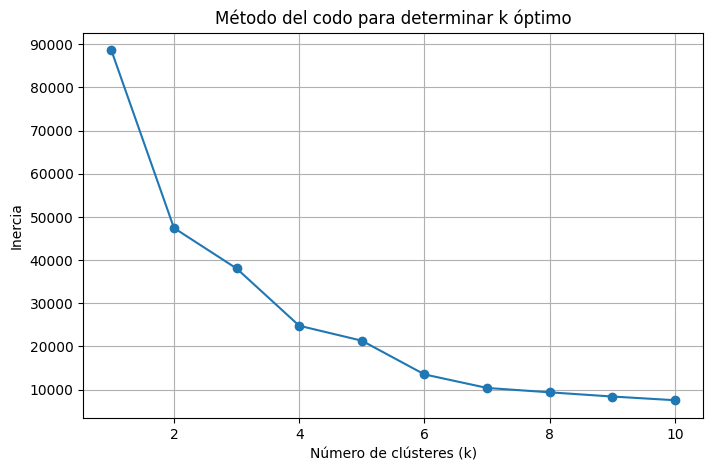

In [21]:
# Calcular inercia para diferentes valores de k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k óptimo')
plt.grid(True)
plt.show()

## 🤖 Paso 6: Aplicar K-Means con número óptimo de clústeres

In [24]:
# Elegir número de clústeres (puedes cambiar el valor de k basado en el codo)
k_optimo = 4
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)
df['cluster'] = pd.Series(cluster_labels, index=X.index)
df.head()

,order_id,fecha,id_item,peso_g,volumen_cm3,latitud,longitud,cluster
0,ec7a019261fce44180373d45b442d78f,2017-01-05 11:56:06,1,200.0,352.0,-25.420212,-49.265095,0
1,b95a0a8bd30aece4e94e81f0591249d8,2017-01-05 12:01:20,1,200.0,352.0,-25.413304,-49.258962,0
2,38bcb524e1c38c2c1b60600a80fc8999,2017-01-05 12:06:36,1,200.0,352.0,-25.406516,-49.268573,0
3,7a18a504c1a4b32d883e68de2e1a7db0,2017-01-05 12:09:08,1,200.0,352.0,-25.401942,-49.269100,0
4,6acecf438369055d9243e121045cca74,2017-01-05 12:11:23,1,200.0,352.0,-25.402432,-49.259722,0


## 🖼️ Paso 7: Visualizar los clústeres

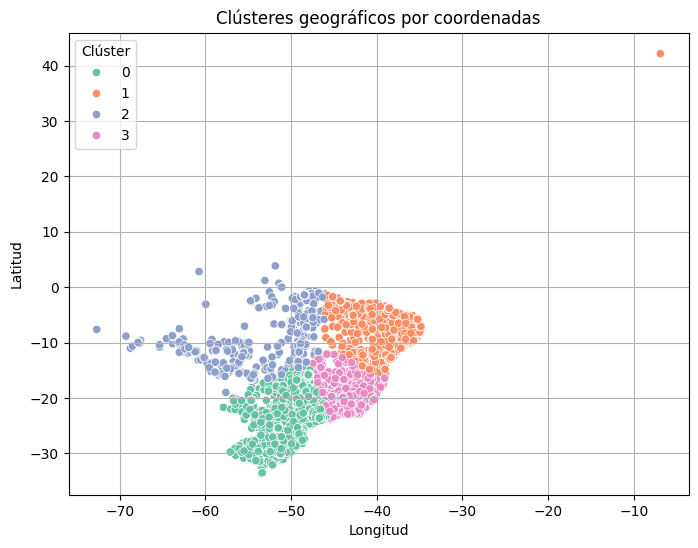

In [25]:
# Gráfico de dispersión de clústeres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitud', y='latitud', hue='cluster', data=df, palette='Set2')
plt.title('Clústeres geográficos por coordenadas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.legend(title='Clúster')
plt.show()

In [28]:
# Guardar el archivo con los clústeres
output_file = "items_clustering.csv"
df.to_csv(output_file, index=False)

# Descargar el archivo con los resultados
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>